In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import f1_score, make_scorer
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score, f1_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

Классификация доходов
Задача прогнозирования состоит в том, чтобы определить, зарабатывает ли человек более 50 тысяч долларов в год.

возраст: постоянный.
рабочий класс: Частный, самоокупаемый, самоокупаемый, Федеральное правительство, Местное правительство, правительство штата, без оплаты, никогда не работал.
НОСРГТ: непрерывный.
образование: бакалавры, некоторые-колледж, 11-й, HS-grad, профшкола, Assoc-acdm, Assoc-voc, 9, 7-8, 12, магистры, 1-4, 10, докторантура, 5-6, Дошкольное.
количество образования: непрерывное.
семейное положение: Женат-гражданский супруг, Разведен, Никогда не состоял в браке, Разведен, Овдовел, Женат-супруг-отсутствует, Женат-AF-супруг.
профессия: Техническая поддержка, Ремесленный ремонт, Другое обслуживание, Продажи, Исполнительный менеджмент, Профильная специальность, Обработчики-уборщики, Машинная инспекция, Адм-канцелярский, Сельское хозяйство-рыболовство, Транспорт-переезд, Частный дом-серв, Охрана-серв, Вооруженные Силы.
отношения: Жена, Собственный ребенок, Муж, Не член семьи, Другой родственник, Не состоит в браке.
раса: белый, азиат-пак-островитянин, амер-индеец-эскимос, Другой, черный.
пол: женский, мужской.
прирост капитала: непрерывный.
потеря капитала: непрерывная.
количество часов в неделю: непрерывно.
страна происхождения: США, Камбоджа, Англия, Пуэрто-Рико, Канада, Германия, Отдаленные районы США (Гуам-USVI-etc), Индия, Япония, Греция, Южная, Китай, Куба, Иран, Гондурас, Филиппины, Италия, Польша, Ямайка, Вьетнам, Мексика, ПортугалияИрландия, Франция, Доминиканская Республика, Лаос, Эквадор, Тайвань, Гаити, Колумбия, Венгрия, Гватемала, Никарагуа, Шотландия, Таиланд, Югославия, Сальвадор, Тринадад и Тобаго, Перу, Гонконг, Голландия.

In [56]:
data = pd.read_csv('income_evaluation.csv')
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [57]:
# удалим дубликаты в данных
data=data.drop_duplicates()

In [4]:
data.info() # сводка информации по датасету

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32537 non-null  int64 
 1    workclass       32537 non-null  object
 2    fnlwgt          32537 non-null  int64 
 3    education       32537 non-null  object
 4    education-num   32537 non-null  int64 
 5    marital-status  32537 non-null  object
 6    occupation      32537 non-null  object
 7    relationship    32537 non-null  object
 8    race            32537 non-null  object
 9    sex             32537 non-null  object
 10   capital-gain    32537 non-null  int64 
 11   capital-loss    32537 non-null  int64 
 12   hours-per-week  32537 non-null  int64 
 13   native-country  32537 non-null  object
 14   income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [5]:
data.shape #размерность данных

(32537, 15)

In [6]:
data.isna().sum() # пропущенные значения

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.dtypes # типы признаков

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [58]:
data_=data.drop(['age',' education-num',' fnlwgt',' capital-gain',' capital-loss',' hours-per-week'],axis=1)

In [59]:
# преобразуем признаки и целевую переменную к числовому формату
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
object_cols=data_.columns
data[object_cols] = ordinal_encoder.fit_transform(data[object_cols])  
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32557,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32558,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32559,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [60]:
data.dtypes

age                  int64
 workclass         float64
 fnlwgt              int64
 education         float64
 education-num       int64
 marital-status    float64
 occupation        float64
 relationship      float64
 race              float64
 sex               float64
 capital-gain        int64
 capital-loss        int64
 hours-per-week      int64
 native-country    float64
 income            float64
dtype: object

In [61]:
data.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.003783,-0.076447,-0.010551,0.036224,-0.266137,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234037
workclass,0.003783,1.000000,-0.016601,0.023456,0.052169,-0.064761,0.254993,-0.090433,0.049740,0.095999,0.033852,0.012240,0.139047,-0.007677,0.051665
fnlwgt,-0.076447,-0.016601,1.000000,-0.028053,-0.043388,0.028123,0.001403,0.008868,-0.021497,0.027089,0.000429,-0.010260,-0.018898,-0.051874,-0.009502
education,-0.010551,0.023456,-0.028053,1.000000,0.359085,-0.038422,-0.021235,-0.011057,0.014303,-0.027433,0.030085,0.016793,0.055991,0.063870,0.079366
education-num,0.036224,0.052169,-0.043388,0.359085,1.000000,-0.069161,0.109753,-0.094432,0.032011,0.012205,0.122664,0.079892,0.148422,0.050136,0.335272
marital-status,-0.266137,-0.064761,0.028123,-0.038422,-0.069161,1.000000,-0.009814,0.185532,-0.067930,-0.129402,-0.043368,-0.034140,-0.190432,-0.023406,-0.199199
occupation,-0.020911,0.254993,0.001403,-0.021235,0.109753,-0.009814,1.000000,-0.075587,0.006794,0.080501,0.025506,0.017985,0.080501,-0.012406,0.075419
relationship,-0.263744,-0.090433,0.008868,-0.011057,-0.094432,0.185532,-0.075587,1.000000,-0.116051,-0.582594,-0.057947,-0.061098,-0.248875,-0.005636,-0.250948
race,0.029116,0.049740,-0.021497,0.014303,0.032011,-0.067930,0.006794,-0.116051,1.000000,0.087472,0.011154,0.018913,0.041920,0.137850,0.071847
sex,0.088708,0.095999,0.027089,-0.027433,0.012205,-0.129402,0.080501,-0.582594,0.087472,1.000000,0.048489,0.045571,0.229187,-0.008256,0.215969


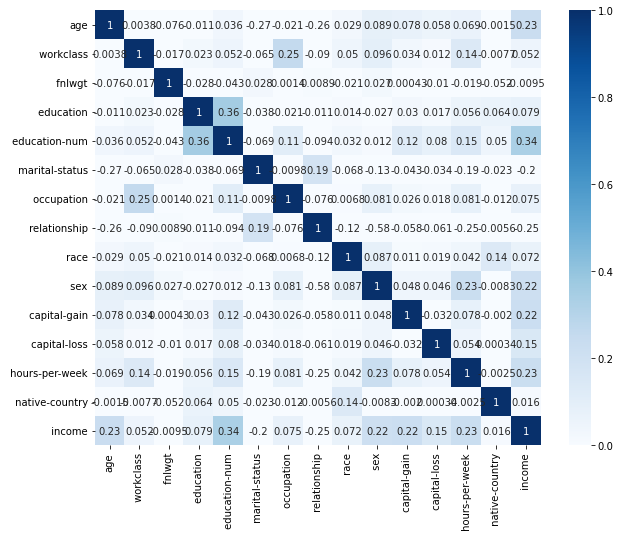

In [62]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.heatmap(data.corr(), vmin=0, vmax=1, cmap = 'Blues', annot = True)

In [14]:
# видим, что каждый фактор влияет на значение целевой перменной

In [15]:
print('Общее количество людей, которые зарабатывают больше 50000:', data[' income'].sum())
print('Процентное отношение людей, которые зарабатывают больше 50000:',data[' income'].sum()/len(data)*100)

Общее количество людей, которые зарабатывают больше 50000: 7839.0
Процентное отношение людей, которые зарабатывают больше 50000: 24.092571533945968


Категориальные переменные

In [16]:
data_=data_.drop([' income'],axis=1)
data_[' education-num']=data[' education-num']
data_[' income']=data[' income']

In [17]:
data_

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,education-num,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,13,0.0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,13,0.0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,9,0.0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,7,0.0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,13,0.0
...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,12,0.0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,9,1.0
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,9,0.0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,9,0.0


In [18]:
col = data_.columns[:-1]

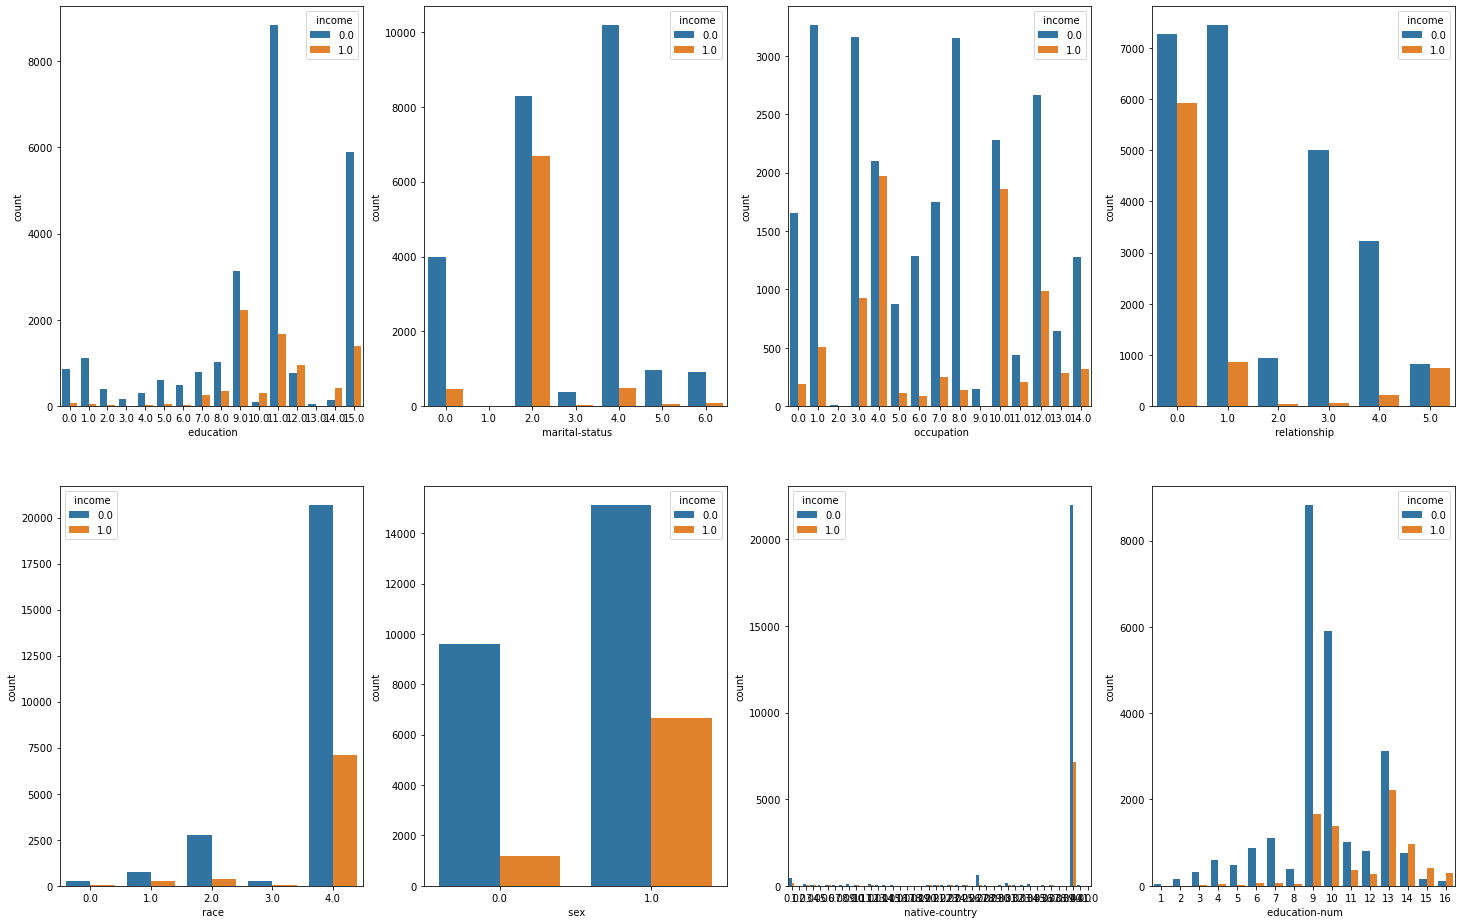

In [19]:
plt.figure(figsize = (25, 25))
for i in range(1, len(col)):
    plt.subplot(3, 4, i)
    sns.countplot(x = data[col[i]], hue = data[' income'])

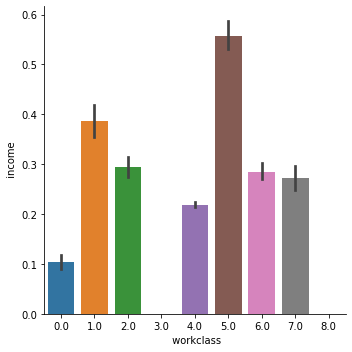

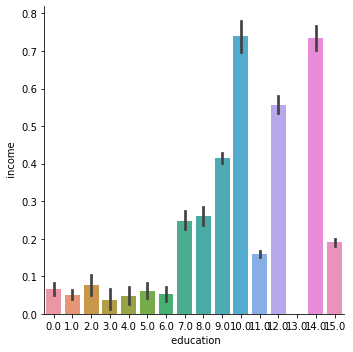

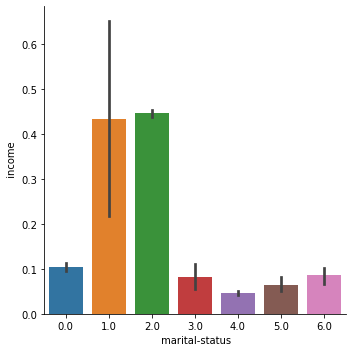

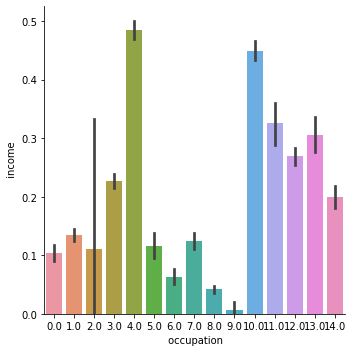

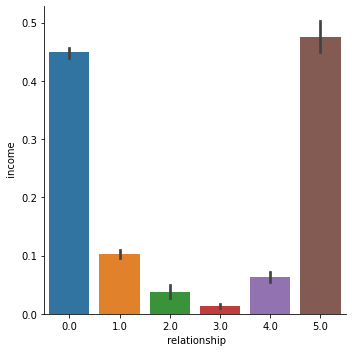

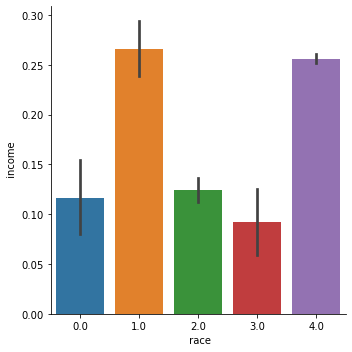

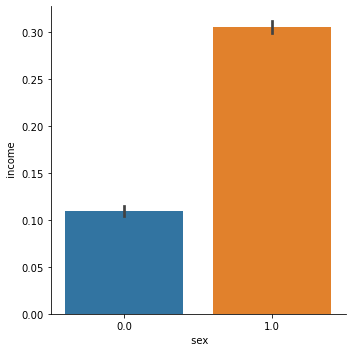

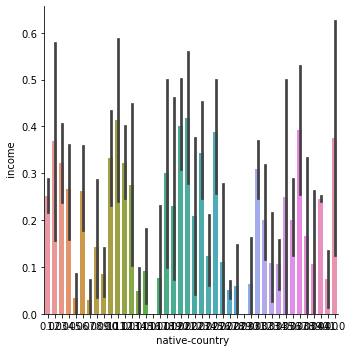

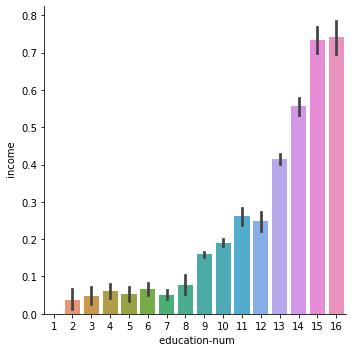

In [24]:
import seaborn as sns
for c in data_.columns[:-1]:
  sns.catplot(x = c , y = " income" , kind='bar', data = data)

In [21]:
# по графикам получили, что:
# education, marital-status, race, native-country, occupation  не влияют на целевую перменную,
# поскольку все столбцы обладают практически одинаковой высотой

Количественные параметры датасета.

In [25]:
data_col=data[[' income','age',' fnlwgt',' capital-gain',' capital-loss',' hours-per-week']]
data_col

,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,0.0,39,77516,2174,0,40
1,0.0,50,83311,0,0,13
2,0.0,38,215646,0,0,40
3,0.0,53,234721,0,0,40
4,0.0,28,338409,0,0,40
...,...,...,...,...,...,...
32556,0.0,27,257302,0,0,38
32557,1.0,40,154374,0,0,40
32558,0.0,58,151910,0,0,40
32559,0.0,22,201490,0,0,20


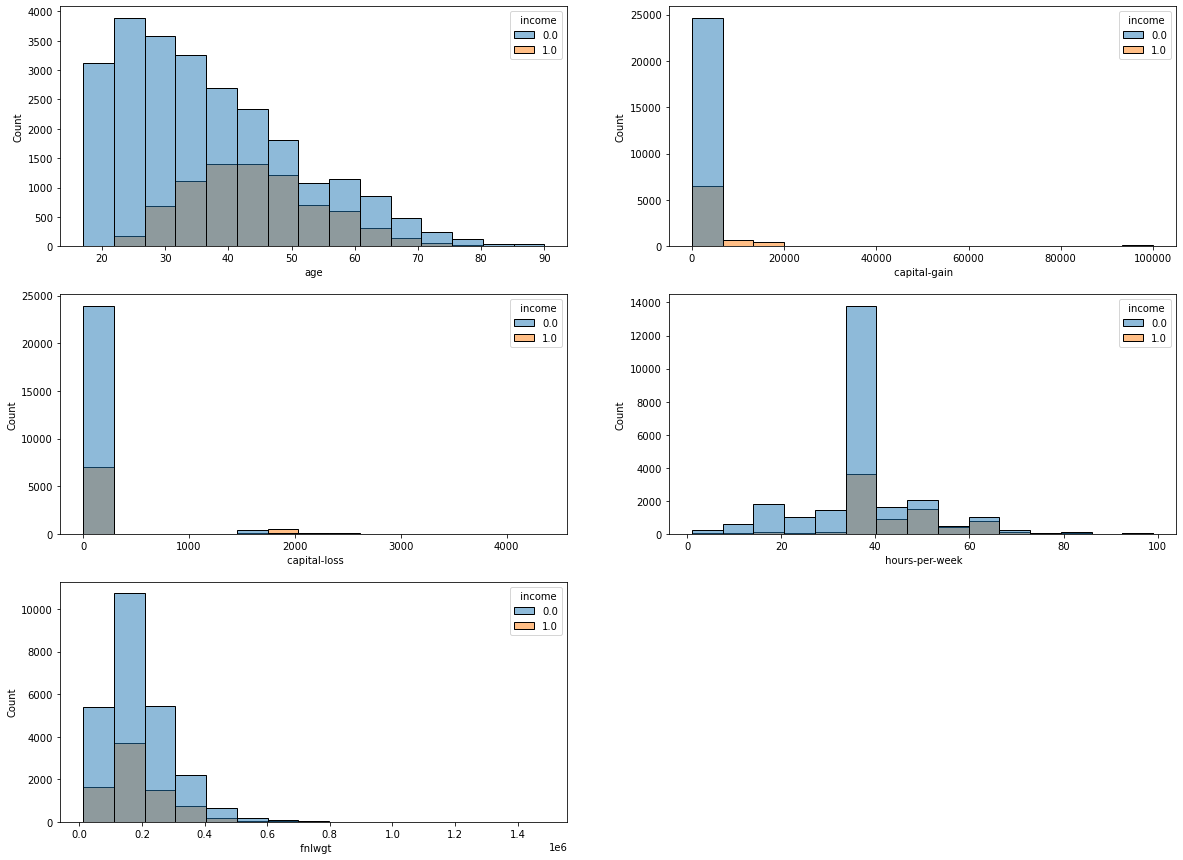

In [26]:
col=['age',' capital-gain',' capital-loss',' hours-per-week', ' fnlwgt']
plt.figure(figsize = (20, 15))
for i in range(1, len(col)+1):
    plt.subplot(3, 2, i)
    sns.histplot(data=data, x=col[i-1], hue=" income",bins=15)

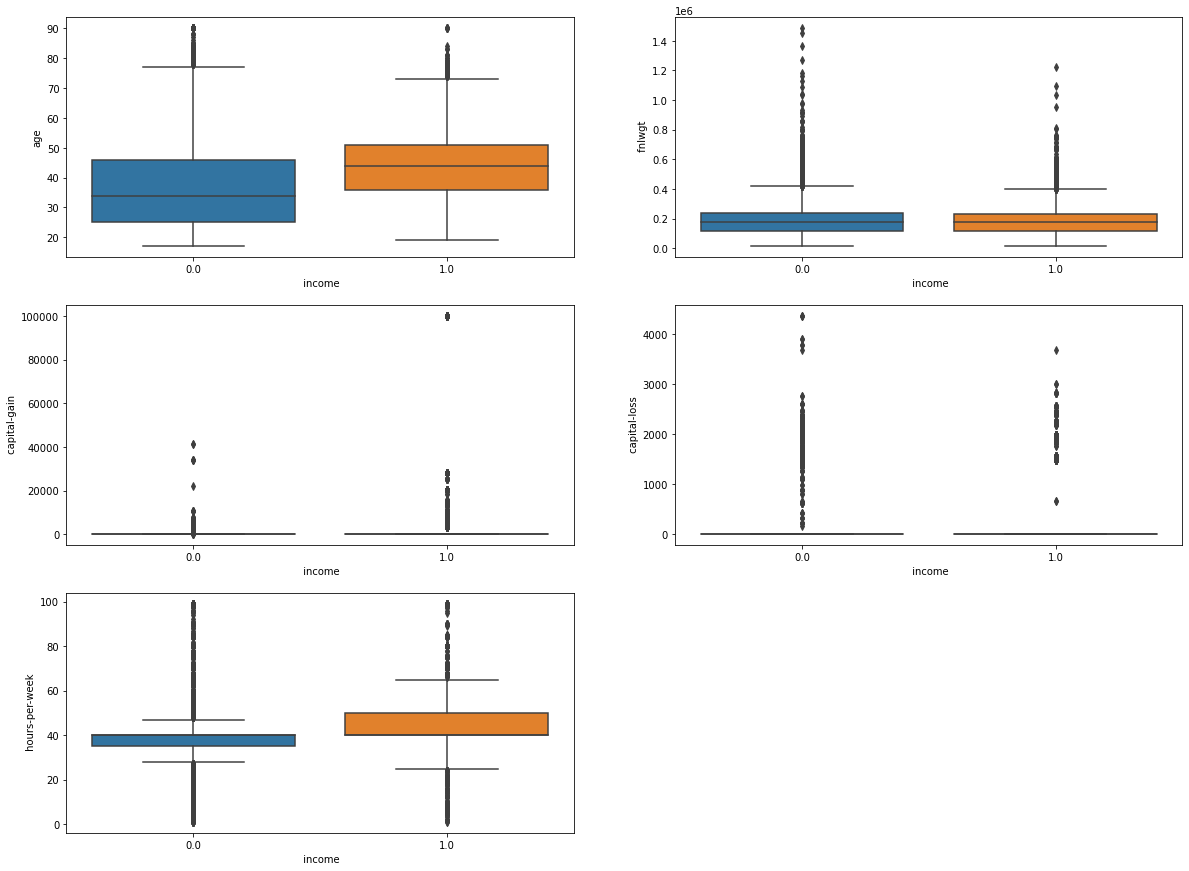

In [27]:
col=['age',' fnlwgt',' capital-gain',' capital-loss',' hours-per-week']
plt.figure(figsize = (20, 15))
for i in range(1, len(col)+1):
    plt.subplot(3, 2, i)
    sns.boxplot(x = ' income', y = col[i-1], data = data)

In [28]:
# по графикам получили, что:
# доход выше у людей, которые старше
# доход выше у людей, которые имеют более высокое образование
# фактор fnlwgt (количество людей с такими же признаками) не влияет на доход, исключим его из модел
и
# доход выше у людей, которые работают больше 40 часов в неделю


In [63]:
# удаление лишних входных данных
data=data.drop([' education',' marital-status',' race',' native-country', ' fnlwgt',' occupation'],axis=1)
data

,age,workclass,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,7.0,13,1.0,1.0,2174,0,40,0.0
1,50,6.0,13,0.0,1.0,0,0,13,0.0
2,38,4.0,9,1.0,1.0,0,0,40,0.0
3,53,4.0,7,0.0,1.0,0,0,40,0.0
4,28,4.0,13,5.0,0.0,0,0,40,0.0
...,...,...,...,...,...,...,...,...,...
32556,27,4.0,12,5.0,0.0,0,0,38,0.0
32557,40,4.0,9,0.0,1.0,0,0,40,1.0
32558,58,4.0,9,4.0,0.0,0,0,40,0.0
32559,22,4.0,9,3.0,1.0,0,0,20,0.0


In [64]:
# удалим дубликаты в данных
data=data.drop_duplicates()

In [66]:
# нормализация данных
data[['age',' capital-gain',' capital-loss',' hours-per-week']]=data[['age',' capital-gain',' capital-loss',' hours-per-week']].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [67]:
data

,age,workclass,education-num,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,0.301370,7.0,13,1.0,1.0,0.021740,0.0,0.397959,0.0
1,0.452055,6.0,13,0.0,1.0,0.000000,0.0,0.122449,0.0
2,0.287671,4.0,9,1.0,1.0,0.000000,0.0,0.397959,0.0
3,0.493151,4.0,7,0.0,1.0,0.000000,0.0,0.397959,0.0
4,0.150685,4.0,13,5.0,0.0,0.000000,0.0,0.397959,0.0
...,...,...,...,...,...,...,...,...,...
32549,0.356164,7.0,10,2.0,0.0,0.000000,0.0,0.397959,0.0
32552,0.356164,4.0,11,0.0,1.0,0.000000,0.0,0.448980,0.0
32553,0.205479,4.0,14,1.0,1.0,0.000000,0.0,0.102041,0.0
32556,0.136986,4.0,12,5.0,0.0,0.000000,0.0,0.377551,0.0


Выделим целевую переменную и факторные переменные.

In [68]:
y = data[' income']
X = data.drop(columns=[' income']) 

Разбьем выборку на обучающую и тестовую

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, shuffle = True)

### Модель № 1 (логистическая регрессия)

In [70]:
log = LogisticRegression(max_iter=5000)

In [71]:
s = time.time()
log.fit(X_train, y_train)
time_learn = time.time()-s

In [72]:
y_pred = log.predict(X_test)
y_score = log.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val = cross_val_score(log,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8322836064577199
accuracy: 0.8097775718257646
precision: 0.7355704697986577
recall: 0.46757679180887374
f1: 0.5717266562336986
cross_val_f1: 0.5611432173897549


In [73]:
table = pd.DataFrame(index=['roc-auc', 'accuracy','precision', 'recall', 'f1','cross_val_f1','time'])
table['LogisticRegression'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                               precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                               f1_score(y_test, y_pred), cross_val, time_learn]

In [74]:
table

,LogisticRegression
roc-auc,0.832284
accuracy,0.809778
precision,0.735570
recall,0.467577
f1,0.571727
cross_val_f1,0.561143
time,0.128487


### Модель № 2 (дерево решений)

In [75]:
clf = tree.DecisionTreeClassifier(criterion = 'gini')

In [76]:
s = time.time()
clf.fit(X_train, y_train)
time_learn = time.time()-s

In [77]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(clf,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.718231514168599
accuracy: 0.7673772011121409
precision: 0.5708263069139966
recall: 0.5776450511945392
f1: 0.5742154368108566
cross_val_f1: 0.5854426792691425


In [78]:
table['DecisionTree'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                        precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                         f1_score(y_test, y_pred), cross_val, time_learn]

In [79]:
table 

,LogisticRegression,DecisionTree
roc-auc,0.832284,0.718232
accuracy,0.809778,0.767377
precision,0.735570,0.570826
recall,0.467577,0.577645
f1,0.571727,0.574215
cross_val_f1,0.561143,0.585443
time,0.128487,0.041263


### Модель № 3 (случайный лес)

In [80]:
RF = RandomForestClassifier()

In [81]:
s = time.time()
RF.fit(X_train, y_train)
time_learn = time.time()-s

In [82]:
y_pred = RF.predict(X_test)
y_score = RF.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(RF,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8587206847215347
accuracy: 0.8018999073215941
precision: 0.6468952734012975
recall: 0.5955631399317406
f1: 0.6201688138605064
cross_val_f1: 0.619733769811731


In [83]:
table['RandomForest'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                        precision_score(y_test, y_pred), recall_score(y_test, y_pred),
                         f1_score(y_test, y_pred), cross_val, time_learn]

### Модель № 4 (Метод опорных векторов - 'rbf')

In [115]:
sv = SVC(probability=True, kernel = 'rbf')

In [116]:
import time
s = time.time()
sv.fit(X_train, y_train)
time_learn = time.time()-s

In [117]:
y_pred = sv.predict(X_test)
y_score = sv.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(sv,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.857912085645555
accuracy: 0.7991195551436515
precision: 0.7091906721536351
recall: 0.44112627986348124
f1: 0.5439242503945292
cross_val_f1: 0.5429581243700616


In [118]:
table['SVM - rbf'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                            precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                            f1_score(y_test, y_pred), cross_val, time_learn]

### Модель № 5 (Метод опорных векторов - 'poly')

In [119]:
sv = SVC(probability=True, kernel = 'poly')

In [120]:
import time
s = time.time()
sv.fit(X_train, y_train)
time_learn = time.time()-s

In [121]:
y_pred = sv.predict(X_test)
y_score = sv.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(sv,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8587451095971307
accuracy: 0.8025949953660797
precision: 0.7446483180428135
recall: 0.41552901023890787
f1: 0.5334063526834611
cross_val_f1: 0.5343064493580191


In [122]:
table['SVM - poly'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                            precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                            f1_score(y_test, y_pred), cross_val, time_learn]

### Модель № 6 (Метод опорных векторов - 'linear')

In [123]:
sv = SVC(probability=True, kernel = 'linear')

In [124]:
import time
s = time.time()
sv.fit(X_train, y_train)
time_learn = time.time()-s

In [125]:
y_pred = sv.predict(X_test)
y_score = sv.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(sv,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8300891670791757
accuracy: 0.8005097312326228
precision: 0.8232848232848233
recall: 0.3378839590443686
f1: 0.4791288566243194
cross_val_f1: 0.48403795285936424


In [126]:
table['SVM - linear'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                f1_score(y_test, y_pred), cross_val, time_learn]

### Модель № 7 (Метод опорных векторов - 'sigmoid')

In [127]:
sv = SVC(probability=True, kernel = 'sigmoid')

In [128]:
import time
s = time.time()
sv.fit(X_train, y_train)
time_learn = time.time()-s

In [129]:
y_pred = sv.predict(X_test)
y_score = sv.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(sv,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.3392598937029414
accuracy: 0.5324374420759963
precision: 0.16105769230769232
recall: 0.17150170648464164
f1: 0.16611570247933882
cross_val_f1: 0.4266654105537224


In [130]:
table['SVM - sigmoid'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                f1_score(y_test, y_pred), cross_val, time_learn]

### Модель № 8 (Байес)

In [100]:
NB = GaussianNB()

In [101]:
s = time.time()
NB.fit(X_train, y_train)
time_learn = time.time()-s

In [102]:
y_pred = NB.predict(X_test)
y_score = NB.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(NB,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8313347000408167
accuracy: 0.7917052826691381
precision: 0.7256198347107438
recall: 0.37457337883959047
f1: 0.494091164884637
cross_val_f1: 0.49751795693778594


In [103]:
table['NB'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
               precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
               f1_score(y_test, y_pred), cross_val, time_learn]

### Модель № 9 (метод k-ближайших соседей)

In [104]:
KN = KNeighborsClassifier(n_neighbors=10)

In [105]:
s = time.time()
KN.fit(X_train, y_train)
time_learn = time.time()-s

In [106]:
y_pred = KN.predict(X_test)
y_score = KN.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(KN,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8472291878348922
accuracy: 0.8079240037071362
precision: 0.7024793388429752
recall: 0.507679180887372
f1: 0.5894006934125805
cross_val_f1: 0.5848243949435796


In [107]:
table['KNN'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                f1_score(y_test, y_pred), cross_val, time_learn]

### Модель № 10 (Градиентный бустинг)

In [108]:
GB = GradientBoostingClassifier(n_estimators=10)

In [109]:
s = time.time()
GB.fit(X_train, y_train)
time_learn = time.time()-s

In [110]:
y_pred = GB.predict(X_test)
y_score = GB.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(GB,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8740345389451927
accuracy: 0.806533827618165
precision: 0.9828080229226361
recall: 0.29266211604095566
f1: 0.45101906640368183
cross_val_f1: 0.4475275034533131


In [111]:
table['GradientBoosting'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                            precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                             f1_score(y_test, y_pred), cross_val, time_learn]

In [136]:
table

,LogisticRegression,DecisionTree,RandomForest,NB,KNN,GradientBoosting,SVM - rbf,SVM - poly,SVM - linear,SVM - sigmoid
roc-auc,0.832284,0.718232,0.858721,0.831335,0.847229,0.874035,0.857912,0.858745,0.830089,0.339260
accuracy,0.809778,0.767377,0.801900,0.791705,0.807924,0.806534,0.799120,0.802595,0.800510,0.532437
precision,0.735570,0.570826,0.646895,0.725620,0.702479,0.982808,0.709191,0.744648,0.823285,0.161058
recall,0.467577,0.577645,0.595563,0.374573,0.507679,0.292662,0.441126,0.415529,0.337884,0.171502
f1,0.571727,0.574215,0.620169,0.494091,0.589401,0.451019,0.543924,0.533406,0.479129,0.166116
cross_val_f1,0.561143,0.585443,0.619734,0.497518,0.584824,0.447528,0.542958,0.534306,0.484038,0.426665
time,0.128487,0.041263,0.986525,0.006714,0.072565,0.096414,25.710351,22.066120,33.197788,20.557341


### GridSearchCV для RandomForest

Построение модели и оптимизация гиперпараметров.

In [137]:
max_depth=[12, 14, 16, 18, 20]
n_estimators = [64, 128, 512]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

dfrst = RandomForestClassifier()

grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, scoring = f_score)
grid_results = grid.fit(X_train, y_train)

grid_results.best_params_


{'max_depth': 14, 'n_estimators': 128}

In [138]:
RF = RandomForestClassifier(max_depth=14, n_estimators=128 )

In [139]:
s = time.time()
RF.fit(X_train, y_train)
time_learn = time.time()-s

In [140]:
y_pred = RF.predict(X_test)
y_score = RF.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(RF,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.9099366635837046
accuracy: 0.8487025023169601
precision: 0.7886540600667408
recall: 0.6049488054607508
f1: 0.6846933848382424
cross_val_f1: 0.6925310567774609


In [142]:
table_best = pd.DataFrame(index=['roc-auc', 'accuracy','precision', 'recall', 'f1','cross_val_f1','time'])
table_best['RandomForest'] = table['RandomForest']
table_best['DecisionTree'] = table['DecisionTree']
table_best['KNN'] = table['KNN']

table_best['RandomForest_GS'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                 f1_score(y_test, y_pred), cross_val, time_learn]

In [143]:
table_best

,RandomForest,DecisionTree,KNN,RandomForest_GS
roc-auc,0.858721,0.718232,0.847229,0.909937
accuracy,0.801900,0.767377,0.807924,0.848703
precision,0.646895,0.570826,0.702479,0.788654
recall,0.595563,0.577645,0.507679,0.604949
f1,0.620169,0.574215,0.589401,0.684693
cross_val_f1,0.619734,0.585443,0.584824,0.692531
time,0.986525,0.041263,0.072565,0.898659


### GridSearchCV для DecisionTree

In [144]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=tree.DecisionTreeClassifier()
dtree_gscv = GridSearchCV(dtree_model, param_grid, scoring = f_score)
dtree_gscv.fit(X_train, y_train)
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 14}

In [145]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=14)

In [146]:
s = time.time()
clf.fit(X_train, y_train)
time_learn = time.time()-s

In [147]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(clf,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8764698347358639
accuracy: 0.8463855421686747
precision: 0.7315741583257507
recall: 0.6860068259385665
f1: 0.7080581241743725
cross_val_f1: 0.6918973733019115


In [148]:
table_best['DecisionTree_GS'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                 f1_score(y_test, y_pred), cross_val, time_learn]

### GridSearchCV для KNN

In [149]:
param_grid = { 'n_neighbors': np.arange(1, 31)}
KN = KNeighborsClassifier()
KN_gscv = GridSearchCV(KN, param_grid, scoring = f_score)
KN_gscv.fit(X_train, y_train)
KN_gscv.best_params_

{'n_neighbors': 29}

In [150]:
KN = KNeighborsClassifier(n_neighbors=29)

In [151]:
s = time.time()
KN.fit(X_train, y_train)
time_learn = time.time()-s

In [152]:
y_pred = KN.predict(X_test)
y_score = KN.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(KN,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8603844258308802
accuracy: 0.8107043558850788
precision: 0.6831785345717234
recall: 0.5648464163822525
f1: 0.6184026156001867
cross_val_f1: 0.6201178577819587


In [153]:
table_best['KNN_GS'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                 f1_score(y_test, y_pred), cross_val, time_learn]

### Добавление суррогатных признаков

In [154]:
pca = PCA(n_components = 5)
X2D= pca.fit_transform(X)
X_new = np.hstack([X, X2D])

In [155]:
X_new.shape

(21576, 13)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size= 0.2, random_state=42, shuffle = True)

In [158]:
RF = RandomForestClassifier(max_depth=14, n_estimators=128 )

In [159]:
s = time.time()
RF.fit(X_train, y_train)
time_learn = time.time()-s

In [160]:
y_pred = RF.predict(X_test)
y_score = RF.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(RF,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8953740099783759
accuracy: 0.8378127896200185
precision: 0.7336633663366336
recall: 0.6322525597269625
f1: 0.6791934005499541
cross_val_f1: 0.6908542642850855


In [161]:
table_best['RandomForest_PCA'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                 f1_score(y_test, y_pred), cross_val, time_learn]

In [162]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=14)

In [163]:
s = time.time()
clf.fit(X_train, y_train)
time_learn = time.time()-s

In [164]:
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(clf,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8464013202459423
accuracy: 0.8280815569972196
precision: 0.6759410801963993
recall: 0.7047781569965871
f1: 0.6900584795321637
cross_val_f1: 0.6908531969935707


In [165]:
table_best['DecisionTree_PCA'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                 f1_score(y_test, y_pred), cross_val, time_learn]

In [166]:
KN = KNeighborsClassifier(n_neighbors=29)

In [167]:
s = time.time()
KN.fit(X_train, y_train)
time_learn = time.time()-s

In [168]:
y_pred = KN.predict(X_test)
y_score = KN.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(KN,  X, y,  cv = 5, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.8579983868726606
accuracy: 0.8093141797961075
precision: 0.6778797145769623
recall: 0.5674061433447098
f1: 0.6177426846261032
cross_val_f1: 0.6201178577819587


In [169]:
table_best['KNN_PCA'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                                precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                 f1_score(y_test, y_pred), cross_val, time_learn]

In [170]:
table_best

,RandomForest,DecisionTree,KNN,RandomForest_GS,DecisionTree_GS,KNN_GS,RandomForest_PCA,DecisionTree_PCA,KNN_PCA
roc-auc,0.858721,0.718232,0.847229,0.909937,0.876470,0.860384,0.895374,0.846401,0.857998
accuracy,0.801900,0.767377,0.807924,0.848703,0.846386,0.810704,0.837813,0.828082,0.809314
precision,0.646895,0.570826,0.702479,0.788654,0.731574,0.683179,0.733663,0.675941,0.677880
recall,0.595563,0.577645,0.507679,0.604949,0.686007,0.564846,0.632253,0.704778,0.567406
f1,0.620169,0.574215,0.589401,0.684693,0.708058,0.618403,0.679193,0.690058,0.617743
cross_val_f1,0.619734,0.585443,0.584824,0.692531,0.691897,0.620118,0.690854,0.690853,0.620118
time,0.986525,0.041263,0.072565,0.898659,0.037927,0.068181,2.362163,0.123037,0.023113


### Голосующий ансамбль

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, shuffle = True)

In [199]:
kfold = model_selection.KFold(n_splits=5)
estimators = []
RF = RandomForestClassifier(max_depth=14, n_estimators=128 )
estimators.append(('RandomForest', RF))
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=14)
estimators.append(('DecisionTree', clf))
KN = KNeighborsClassifier(n_neighbors=29)
estimators.append(('KNN', KN))
ensemble = VotingClassifier(estimators, voting = 'soft')
results = cross_val_score(ensemble, X, y, cv=kfold,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.6946325937374229


In [200]:
s = time.time()
ensemble.fit(X_train, y_train)
time_learn = time.time()-s

In [201]:
y_pred = ensemble.predict(X_test)
y_score = ensemble.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(ensemble,  X, y,  cv = kfold, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.9052024442244397
accuracy: 0.8463855421686747
precision: 0.7507389162561576
recall: 0.6501706484641638
f1: 0.6968449931412893
cross_val_f1: 0.6927375120255794


In [205]:
ensemb = pd.DataFrame(index=['roc-auc', 'accuracy','precision', 'recall', 'f1','cross_val_f1','time'])
ensemb['RandomForest_GS'] = table_best['RandomForest_GS']
ensemb['DecisionTree_GS'] = table_best['DecisionTree_GS']
ensemb['KNN_GS'] = table_best['KNN_GS']

ensemb['Ensemble_3'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                        precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                        f1_score(y_test, y_pred), cross_val, time_learn]

In [206]:
ensemb

,RandomForest_GS,DecisionTree_GS,KNN_GS,Ensemble_3
roc-auc,0.909937,0.876470,0.860384,0.905202
accuracy,0.848703,0.846386,0.810704,0.846386
precision,0.788654,0.731574,0.683179,0.750739
recall,0.604949,0.686007,0.564846,0.650171
f1,0.684693,0.708058,0.618403,0.696845
cross_val_f1,0.692531,0.691897,0.620118,0.692738
time,0.898659,0.037927,0.068181,1.010195


In [207]:
kfold = model_selection.KFold(n_splits=5)
estimators = []
RF = RandomForestClassifier(max_depth=14, n_estimators=128 )
estimators.append(('RandomForest', RF))
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=14)
estimators.append(('DecisionTree', clf))
ensemble = VotingClassifier(estimators, voting = 'soft')
results = cross_val_score(ensemble, X, y, cv=kfold,scoring=f_score)
print('Средняя точность на тесте при кросс-валидации:',results.mean())

Средняя точность на тесте при кросс-валидации: 0.6877600337635388


In [208]:
s = time.time()
ensemble.fit(X_train, y_train)
time_learn = time.time()-s

In [209]:
y_pred = ensemble.predict(X_test)
y_score = ensemble.predict_proba(X_test)[:,1]
f_score = make_scorer(f1_score)
cross_val=cross_val_score(ensemble,  X, y,  cv = kfold, scoring=f_score).mean()

print('roc-auc:', roc_auc_score(y_test, y_score))
print('accuracy:', accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('cross_val_f1:', cross_val)

roc-auc: 0.9055879501775961
accuracy: 0.845227062094532
precision: 0.7432432432432432
recall: 0.6569965870307167
f1: 0.6974637681159421
cross_val_f1: 0.6879273948671716


In [210]:
ensemb['Ensemble_2'] = [roc_auc_score(y_test, y_score), accuracy_score(y_test, y_pred), 
                        precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                        f1_score(y_test, y_pred), cross_val, time_learn]

In [211]:
ensemb

,RandomForest_GS,DecisionTree_GS,KNN_GS,Ensemble_3,Ensemble_2
roc-auc,0.909937,0.876470,0.860384,0.905202,0.905588
accuracy,0.848703,0.846386,0.810704,0.846386,0.845227
precision,0.788654,0.731574,0.683179,0.750739,0.743243
recall,0.604949,0.686007,0.564846,0.650171,0.656997
f1,0.684693,0.708058,0.618403,0.696845,0.697464
cross_val_f1,0.692531,0.691897,0.620118,0.692738,0.687927
time,0.898659,0.037927,0.068181,1.010195,0.986578
